In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
bank=pd.read_csv('/content/bank-full (2).csv',sep=";")

In [97]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [98]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **EDA**

1. Checking Null values

In [99]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

As we saw above there is **no null values** presented.

2. Checking Duplicated Values

In [100]:
bank.duplicated().sum()

0

As we saw above there is **no duplicated** values are There in The above data.

3. Changing The categorical values to Numerical

In [101]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [102]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [128]:
bank1=pd.get_dummies(bank,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])
bank1['y']=bank1['y'].replace('yes',1)
bank1['y']=bank1['y'].replace('no',0)
bank1

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


3. Checking Unique characters in a particular variable

In [129]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [130]:
bank['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [131]:
bank['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [132]:
bank['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [133]:
bank['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [134]:
bank['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [135]:
bank['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [136]:
bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [137]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [138]:
bank1.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [139]:
bank1.tail()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
45210,37,2971,17,361,2,188,11,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [140]:
bank1.shape

(45211, 52)

## **Model Building.**

In [141]:
x=pd.concat([bank1.iloc[:,0:7],bank1.iloc[:,8:]],axis=1)
y=bank1.iloc[:,7]

In [142]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [143]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=70)

In [146]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
29071,56,778,2,315,2,208,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8469,24,1073,3,569,2,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
39790,43,1059,1,335,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
14668,35,313,15,479,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
28888,32,1465,30,118,5,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21563,45,740,19,109,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
25916,30,946,19,1065,1,183,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
44824,28,127,16,1334,2,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
21618,42,248,19,163,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [147]:
y_train

29071    0
8469     0
39790    1
14668    0
28888    0
        ..
21563    0
25916    0
44824    1
21618    0
23886    0
Name: y, Length: 31647, dtype: int64

In [148]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
38916,27,565,18,170,2,346,11,0,0,0,...,0,0,1,0,0,0,1,0,0,0
32499,41,442,17,261,3,322,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20989,35,688,14,137,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13159,35,148,8,199,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
41739,29,3528,8,137,1,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37744,41,1880,14,35,1,356,10,0,1,0,...,0,0,1,0,0,0,0,1,0,0
29666,48,2,3,165,5,6,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14868,43,714,16,255,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26526,39,1209,20,60,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [149]:
y_test

38916    0
32499    0
20989    0
13159    0
41739    1
        ..
37744    0
29666    0
14868    0
26526    0
5193     0
Name: y, Length: 13564, dtype: int64

In [150]:
#importing the model
from sklearn.linear_model import LogisticRegression

In [151]:
#initializing and fitting the model on train data
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [154]:
#checking the score
model.score(x_train,y_train)

0.8915221032009353

## **Model Prediction and validation**

In [163]:
ypred=model.predict(x_test)

In [164]:
#importing the confusion matrix because confusion matrix is the one of most important validation technique for logistic regression problems.
from sklearn.metrics import confusion_matrix

In [165]:
#confusion matrix for test data
cm= confusion_matrix(y_test,ypred)

In [166]:
cm

array([[11745,   232],
       [ 1247,   340]])

In [159]:
from sklearn.metrics import classification_report

In [160]:
pred=model.predict(x)
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [162]:
#confusion matrix for the data
cm1= confusion_matrix(y,pred)

In [167]:
cm1

array([[39150,   772],
       [ 4140,  1149]])

In [169]:
#in confusion matrix we can calculate accuracy as number of correct predictions divided by total number of predictions made by the model.
((39150+1149)/(39150+772+4140+1149))

0.8913538740571985

In [170]:
df=pd.DataFrame({'Actual':y,"predicted":pred})

In [171]:
df

,Actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [172]:
# In Binary Classification Problem , we Usually Conevrt score given By The Model To Predicted Value By Applying Threshold.
# Generally The Standard Threshold Value Is 0.5
# If The Score Is Greater Than Threshold (i.e Threshold>0.5=1) we Predict 1, Otherwise (i.e Threshold<0.5=0) We Predict 0.
# If We Notice In The Above Model Score i.e Is 89.13, So we Predict The 1.

model.predict_proba(x)[:,1]

array([0.04158183, 0.02510157, 0.02142244, ..., 0.6608801 , 0.08436539,
       0.17983911])

In [173]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

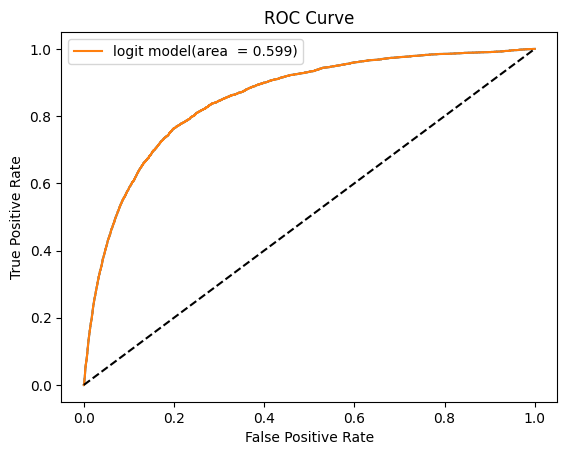

auc accuracy: 0.5989528133462065


In [174]:
# ROC_Curve Is a Receiver Operator Characterstic Curve is Evalution Matrix in Binary Classification Problems.
# It Is a Probability Curve That Plots TPR(Sinsitivity or Recall) and FPR(1-Specificity or TNR) at various Thresholds.
# AOC_Curve Is a Area Under The Curve Whic is used as Summary of the ROC_Curve.
# The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.


fpr,tpr,thresholds=roc_curve(y,model.predict_proba(x)[:,1])
plt.plot(fpr,tpr)
auc=roc_auc_score(y,pred)

plt.title('ROC Curve')
plt.plot(fpr,tpr,label='logit model(area  = %0.3f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('auc accuracy:',auc)

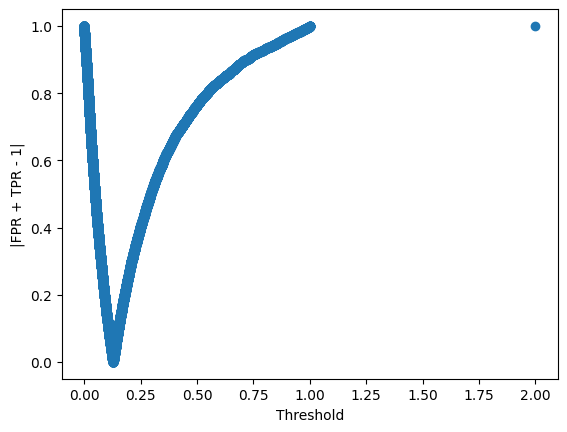

In [175]:
# Finding The Exact Threshold Value From The ROC_curve.
fpr, tpr, thresholds = roc_curve(y,model.predict_proba(x)[:,1],drop_intermediate=False)

plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

In [176]:
thresholds[np.argmin(np.abs(fpr+tpr-1))]

0.12739958166236012